In [ ]:

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models   import Sequential
from keras.layers   import Dense
from keras.layers   import Dropout
from keras.layers   import Convolution2D
from keras.layers   import MaxPooling2D
from keras.layers   import Flatten
from keras.utils    import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics         import classification_report

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32')
x_train/=255
y_train_cat = to_categorical(y_train, 10)
x_test = x_test.astype('float32')
x_test/=255
y_test_cat = to_categorical(y_test, 10)

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


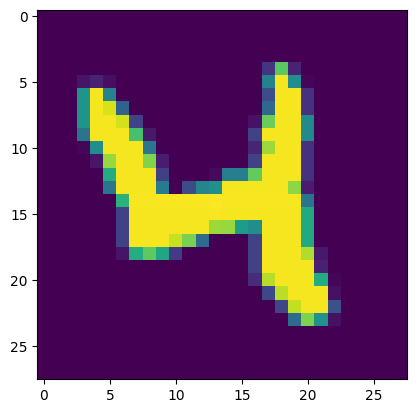

In [ ]:
idx = 20
plt.imshow(x_train[idx])
print(y_train[idx])
print(y_train_cat[idx])

In [ ]:
red_digitos = Sequential()

## agregamos convoluciones
## 2 bloques con su respectivo filtro de Max Pooling
red_digitos.add(Convolution2D(12, kernel_size=(3,3), activation='relu', 
                       input_shape=(28,28,1)))
red_digitos.add(MaxPooling2D(pool_size=(2,2)))
# red_digitos.add(Dropout(0.25))

red_digitos.add(Convolution2D(48, kernel_size=(3,3), activation='relu'))
red_digitos.add(MaxPooling2D(pool_size=(2,2)))
# red_digitos.add(Dropout(0.25))

## Despues de sacar atributos, debemos pasarla
## al perceptrón, para eso debemos "aplanar" el tensor
red_digitos.add(Flatten())

## Construimos el perceptrón
red_digitos.add(Dense(128, activation='relu'))
# red_digitos.add(Dropout(0.5))

## después de dos capas agregamos la capa final que debe 
## tener una activacion de softmax y 10 unidades
red_digitos.add(Dense(10, activation='softmax'))

red_digitos.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 12)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 48)        5232      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 5, 48)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1200)              0         
                                                                 
 dense_24 (Dense)            (None, 128)              

Compilamos el modelo, lo que significa definir el método de optimización y la función de pérdida, así como la métrica para determinar qué tan bien resultó la salida.

In [ ]:
red_digitos.compile(optimizer="adam", 
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])

Una vez compilada nuestra red ya podemos entrenar.

In [ ]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
epocas = 10
lotes = 128

H = red_digitos.fit(x=x_train, y=y_train_cat,
                    validation_data=(x_test, y_test_cat), 
                    epochs=epocas,
                    workers=4,
                    batch_size=64)

Epoch 1/10
469/469 [==============================] - 44s 88ms/step - loss: 0.2392 - accuracy: 0.9339 - val_loss: 0.0653 - val_accuracy: 0.9797
Epoch 2/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0479 - val_accuracy: 0.9852
Epoch 3/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0389 - val_accuracy: 0.9858
Epoch 4/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0346 - val_accuracy: 0.9887
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0305 - val_accuracy: 0.9893
Epoch 6/10
469/469 [==============================] - 34s 71ms/step - loss: 0.0214 - accuracy: 0.9937 - val_loss: 0.0319 - val_accuracy: 0.9892
Epoch 7/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0184 - accuracy: 0.9946 - val_loss: 0.0363 - val_accuracy:

In [ ]:
score = red_digitos.evaluate(x_test, y_test_cat, verbose=1)
score

313/313 [==============================] - 3s 8ms/step - loss: 0.0268 - accuracy: 0.9915


[0.026764925569295883, 0.9915000200271606]

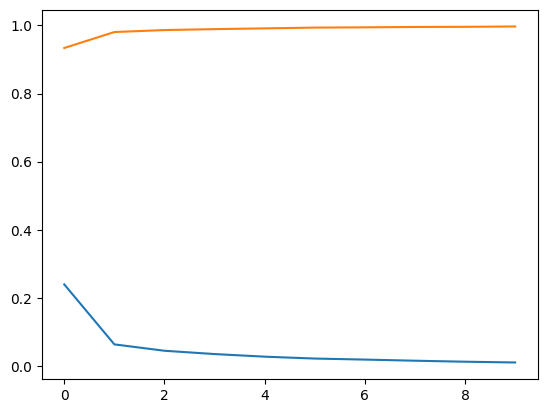

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['accuracy'])

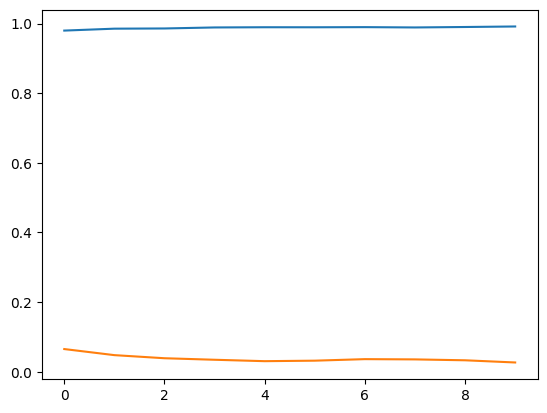

In [ ]:
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['val_loss'])

In [ ]:
idx_test = 40
x_test[idx_test].shape, x_train[idx_test].shape

((28, 28), (28, 28))

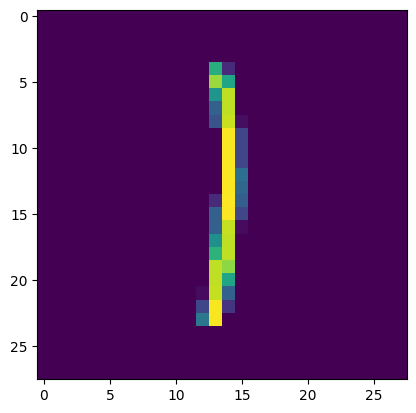

In [ ]:
plt.imshow(x_test[idx_test])

In [ ]:
pred = red_digitos.predict(x_test[idx_test].reshape(1,28,28,1))
pred

1/1 [==============================] - 0s 26ms/step


array([[3.9573461e-08, 9.9995017e-01, 3.5319039e-07, 6.8603421e-09,
        9.7693392e-06, 3.5977334e-07, 2.3140888e-07, 2.1253711e-05,
        1.4678345e-05, 3.1785496e-06]], dtype=float32)

In [ ]:
np.argmax(np.round(pred)), y_test[idx_test]

(1, 1)

9